In [11]:
#No me convence totalmente, muy pobre
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib widget 
# Cargar el conjunto de datos Mall Customer Segmentation
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Seleccionar características relevantes para el clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


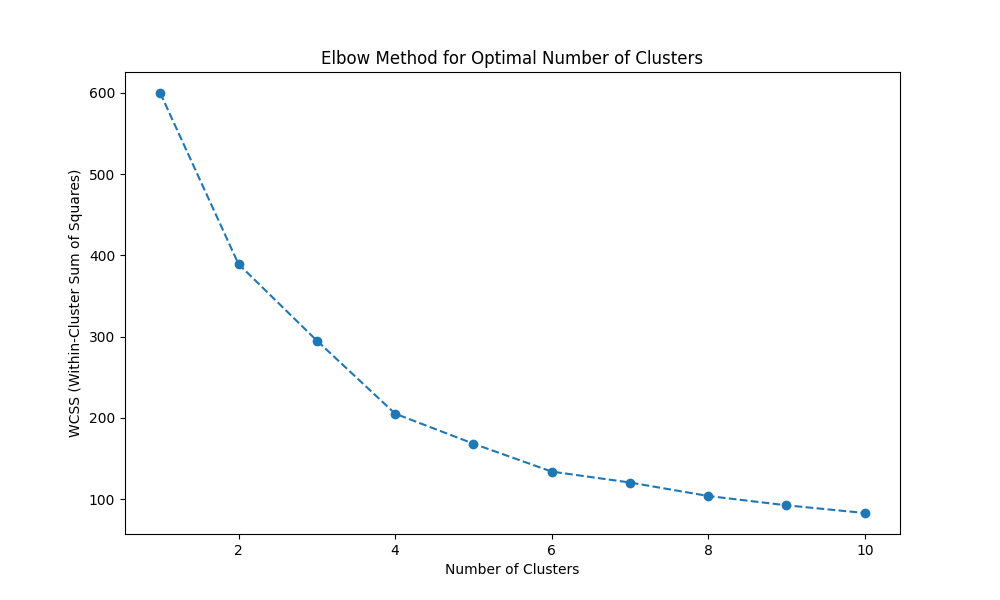

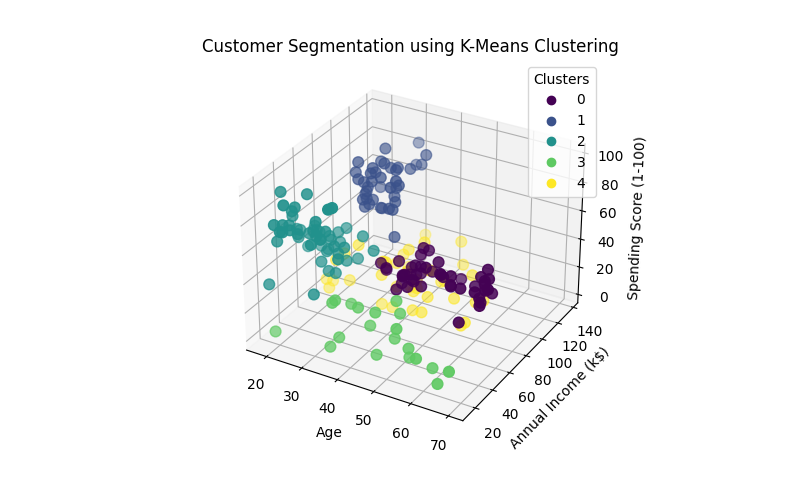

In [14]:
# Visualizar el método del codo para determinar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Basado en el método del codo, elegir un número óptimo de clusters (por ejemplo, 5)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Añadir las etiquetas de cluster al conjunto de datos original
df['cluster'] = kmeans.labels_

# Visualizar los clusters en un diagrama de dispersión 3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['cluster'], s=60, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation using K-Means Clustering')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()
